#***1.3 Training the network on shuffled labels:***


In [1]:
# pip install torch

In [2]:
# pip install torchvision

In [3]:
import torch
import os
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

In [4]:
project_name = "01-cifar10-cnn"

In [5]:
# download the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, ".")

Using downloaded and verified file: ./cifar10.tgz


In [6]:
# extract from archive into train and test dataset
# with tarfile.open("./cifar10.tgz", "r:gz") as tar:
#   tar.extractall(path="./data")

In [7]:
data_dir = "./data/cifar10"
print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['train', 'test']
['frog', 'bird', 'airplane', 'dog', 'deer', 'cat', 'automobile', 'truck', 'ship', 'horse']


In [8]:
# transform the images into tensors
dataset = ImageFolder(data_dir+"/train", transform=ToTensor())
indices = np.random.permutation(len(dataset))
shuffled_trainset = torch.utils.data.Subset(dataset, indices)

Changing tensor dimensions to be viewable in Matplotlib.

In [9]:
from torch.utils.data.dataloader import DataLoader
batch_size = 4

In [10]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(shuffled_trainset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

In [11]:
# divides data into batches
train_dl = DataLoader(train_ds,batch_size,shuffle=True,num_workers=4,pin_memory=True)
val_dl = DataLoader(val_ds,batch_size*2,num_workers=4,pin_memory=True)

# **Creating Networks**

EACH NETWORK IS A SLIGHT VARIATION OF THE OTHER, TYPICALLY COMMENTS WILL BE AT THE TOP EXPLAINING THE VARIATION.


effect of conv2d layer on width and height:
W = input width/input height
F = Filter width/filter height
P = Padding
S = Stride
(W-F +2P)/S+1

effect of pooling layer:
W/2

flattening dimensions need to be equal to:
number_of_filters*output_height*output_width

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
from torch.nn.modules import Softmax
from torch.nn.modules.activation import ReLU

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.pool = nn.MaxPool2d(2,2)
    self.conv2 = nn.Conv2d(6,16,5)
    self.fc1 = nn.Linear(16*12*12, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.25)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.Dropout(x)
    x = x.view(-1, 16*12*12)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [14]:
# has the same number of params as ConvNet_one
class ConvNet_two(nn.Module):
  def __init__(self):
    super(ConvNet_two, self).__init__()
    self.conv1 = nn.Conv2d(3,12,3)
    self.conv2 = nn.Conv2d(12,18,3)
    self.conv3 = nn.Conv2d(18,26,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(26*6*6, 100)
    self.fc2 = nn.Linear(100, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 26*6*6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [15]:
class ConvNet_three(nn.Module):
  def __init__(self):
    super(ConvNet_three, self).__init__()
    self.conv1 = nn.Conv2d(3,64,3)
    self.conv2 = nn.Conv2d(64,128,3)
    self.conv3 = nn.Conv2d(128,256,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(256*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 256*6*6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [16]:
class ConvNet_three(nn.Module):
  def __init__(self):
    super(ConvNet_three, self).__init__()
    self.conv1 = nn.Conv2d(3,64,3)
    self.conv2 = nn.Conv2d(64,128,3)
    self.conv3 = nn.Conv2d(128,256,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(256*6*6, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 256*6*6)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [17]:
# variation in forward function and parameters on Net_three
class ConvNet_four(nn.Module):
  def __init__(self):
    super(ConvNet_four, self).__init__()
    self.conv1 = nn.Conv2d(3,64,3)
    self.conv2 = nn.Conv2d(64,128,3)
    self.conv3 = nn.Conv2d(128,256,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(256*13*13, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 256*13*13)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [18]:
# variation in parameters on Net_four
class ConvNet_five(nn.Module):
  def __init__(self):
    super(ConvNet_five, self).__init__()
    self.conv1 = nn.Conv2d(3,16,3)
    self.conv2 = nn.Conv2d(16,48,3)
    self.conv3 = nn.Conv2d(48,64,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(64*13*13, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.pool(F.relu(self.conv3(x)))
    x = self.Dropout(x)
    x = x.view(-1, 64*13*13)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [19]:
# variation on parameters and number of cnn layers
class ConvNet_six(nn.Module):
  def __init__(self):
    super(ConvNet_six, self).__init__()
    self.conv1 = nn.Conv2d(3,16,3)
    self.conv2 = nn.Conv2d(16,48,3)
    self.conv3 = nn.Conv2d(48,64,3)
    self.conv4 = nn.Conv2d(64,80,3)
    self.conv5 = nn.Conv2d(80,106,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(106*22*22, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = self.Dropout(x)
    x = x.view(-1, 106*22*22)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [20]:
# variation that decreases parameters dramatically but retains the deep network
class ConvNet_seven(nn.Module):
  def __init__(self):
    super(ConvNet_seven, self).__init__()
    self.conv1 = nn.Conv2d(3,10,5)
    self.conv2 = nn.Conv2d(10,10,5)
    self.conv3 = nn.Conv2d(10,12,5)
    self.conv4 = nn.Conv2d(12,16,5)
    self.conv5 = nn.Conv2d(16,18,5)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(18*12*12, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = self.Dropout(x)
    x = x.view(-1, 18*12*12)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [21]:
# variation of larger parameters with heavier pooling
class ConvNet_eight(nn.Module):
  def __init__(self):
    super(ConvNet_eight, self).__init__()
    self.conv1 = nn.Conv2d(3,24,3)
    self.conv2 = nn.Conv2d(24,48,3)
    self.conv3 = nn.Conv2d(48,64,3)
    self.conv4 = nn.Conv2d(64,128,3)
    self.conv5 = nn.Conv2d(128,256,3)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(256*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = self.pool(F.relu(self.conv4(x)))
    x = self.pool(F.relu(self.conv5(x)))
    x = self.Dropout(x)
    x = x.view(-1, 256*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [22]:
# variation in type of activation function
class ConvNet_nine(nn.Module):
  def __init__(self):
    super(ConvNet_nine, self).__init__()
    self.conv1 = nn.Conv2d(3,10,5)
    self.conv2 = nn.Conv2d(10,10,5)
    self.conv3 = nn.Conv2d(10,12,5)
    self.conv4 = nn.Conv2d(12,16,5)
    self.conv5 = nn.Conv2d(16,18,5)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(18*12*12, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.sigmoid(self.conv1(x))
    x = F.sigmoid(self.conv2(x))
    x = F.sigmoid(self.conv3(x))
    x = F.sigmoid(self.conv4(x))
    x = F.sigmoid(self.conv5(x))
    x = self.Dropout(x)
    x = x.view(-1, 18*12*12)
    x = F.sigmoid(self.fc1(x))
    x = F.sigmoid(self.fc2(x))
    x = self.fc3(x)
    return x

In [23]:
# variation is a smaller parameter network with a larger kernel
class ConvNet_ten(nn.Module):
  def __init__(self):
    super(ConvNet_ten, self).__init__()
    self.conv1 = nn.Conv2d(3,10,5)
    self.conv2 = nn.Conv2d(10,10,5)
    self.conv3 = nn.Conv2d(10,12,5)
    self.conv4 = nn.Conv2d(12,16,5)
    self.conv5 = nn.Conv2d(16,18,5)
    self.pool = nn.MaxPool2d(2,2)
    self.fc1 = nn.Linear(18*12*12, 120)
    self.fc2 = nn.Linear(120, 84)
    self.Dropout = nn.Dropout(0.5)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = F.relu(self.conv5(x))
    x = self.Dropout(x)
    x = x.view(-1, 18*12*12)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

# **CAN NETWORK FIT RANDOM LABELS?:**
# Training 10 different models on CIFAR10 data that has been shuffled (as seen above).
# Each model has a different architecture and constrasts training and testing, loss and accuracy.
The following functions are used to train, evaluate, and plot the models.

In [24]:
# plot the loss of your model's training in comparison to testing
def plot_comp(training, testing, metric, title="Training vs Testing"):
    plt.plot(training, color="red", label="training")
    plt.plot(testing, color="blue", label="testing")

    plt.xlabel('Test Images')
    plt.ylabel(metric)
    plt.title(title)
    plt.legend()
    plt.show()

In [25]:
# make sure to init the model before entering it into the func

# this model will train, test, and plot the network
def fill_model(model):
    # creating lists to keep track of metrics
    model_training_loss = []
    model_testing_loss = []
    model_weights = []
    model_training_accuracy = []
    model_testing_accuracy = []

    # train and evaluate
    model_training_loss, model_three_weights = fit_model(model, model_training_accuracy)
    model_testing_loss = evaluate_model(model, model_testing_accuracy)

    # plot model training vs testing
    plot_comp(model_training_loss, model_testing_loss, "Loss")
    plot_comp(model_training_accuracy, model_testing_accuracy, "Accuracy")

In [26]:
# collect weights function
class CollectWeights:
  def __init__(self, model):
    self.model = model
    self.epoch_weights = []

  def end_of_epoch(self, epoch, logs={}):
    state_dict = self.model.state_dict()
    self.epoch_weights.append(state_dict)

In [27]:
# fit model function
n_total_steps = len(train_dl)
num_epochs = 5

def fit_model(model, model_accuracy):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=.001)
    callback = CollectWeights(model)
    model_list = []
    
    model.eval()

    # begin training loop
    for epoch in range(num_epochs):
        for i, (images,labels) in enumerate(train_dl):
            images = images.to(device)
            labels = labels.to(device)

            # forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # collects loss values
            if (i % ((len(train_dl)*num_epochs)/len(val_dl)) == 0):
                model_list.append(loss.item())

            # print epoch metrics
            if (i % len(train_dl) == 0):
                print(f'MODEL: Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

                # collect weights
                callback.end_of_epoch(epoch)

        print(f'MODEL: Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

    # record training accuracy
    with torch.no_grad():
        correct = 0
        total = 0
        i = 0
        check_value = (len(train_dl)/len(val_dl))
        for images,labels in train_dl:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuract_value = 100*correct/total
            if(i % check_value == 0):
                model_accuracy.append(accuract_value)
            i+=1
    
    #collect parameters of model at every epoch
    params = model.state_dict()
    for name, param in params.items():
        print(f'{name}: {param.shape}')
    print("check: ", check_value)
    return model_list, callback.epoch_weights


In [28]:
# evaluate model accuracy and loss
def evaluate_model (model, model_list):
    criterion = nn.CrossEntropyLoss()
    model.eval()
    running_loss = []
    
    with torch.no_grad():
        correct = 0
        total = 0
        for images,labels in val_dl:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)

            # record loss
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data,1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            accuract_value = 100*correct/total
            model_list.append(accuract_value)
            
            # collects loss values
            running_loss.append(loss.item())
      
    print(f"Accuract of the model on the test images: {100*correct/total}%")
    print(f"Loss of the network on the test images: {loss.item()}")
    return running_loss

# **Model Training and Evaluation**
Each cell below includes the model's training and evaluation functions.

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3086
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.4102
MODEL: Epoch [2/5], Step [1/11250], Loss: 1.9257
MODEL: Epoch [2/5], Step [11250/11250], Loss: 1.0306
MODEL: Epoch [3/5], Step [1/11250], Loss: 1.4540
MODEL: Epoch [3/5], Step [11250/11250], Loss: 1.9075
MODEL: Epoch [4/5], Step [1/11250], Loss: 0.8351
MODEL: Epoch [4/5], Step [11250/11250], Loss: 1.3543
MODEL: Epoch [5/5], Step [1/11250], Loss: 1.4403
MODEL: Epoch [5/5], Step [11250/11250], Loss: 1.0028
conv1.weight: torch.Size([6, 3, 5, 5])
conv1.bias: torch.Size([6])
conv2.weight: torch.Size([16, 6, 5, 5])
conv2.bias: torch.Size([16])
fc1.weight: torch.Size([120, 2304])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])
check:  18.0
Accuract of the model on the test images: 46.78%
Loss of the network on the test images: 1.632978916168213


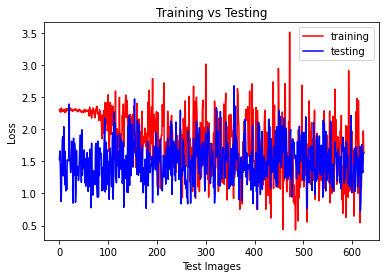

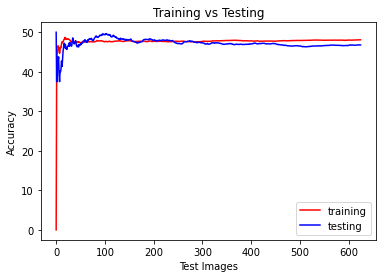

In [29]:
# init model_one architecture
model_one = ConvNet().to(device)

# train, test, and plot the model
fill_model(model_one)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3407
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2960
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.3070
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.3002
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.3038
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.3018
MODEL: Epoch [4/5], Step [1/11250], Loss: 2.3030
MODEL: Epoch [4/5], Step [11250/11250], Loss: 2.0961
MODEL: Epoch [5/5], Step [1/11250], Loss: 1.9784
MODEL: Epoch [5/5], Step [11250/11250], Loss: 2.0841
conv1.weight: torch.Size([12, 3, 3, 3])
conv1.bias: torch.Size([12])
conv2.weight: torch.Size([18, 12, 3, 3])
conv2.bias: torch.Size([18])
conv3.weight: torch.Size([26, 18, 3, 3])
conv3.bias: torch.Size([26])
fc1.weight: torch.Size([100, 936])
fc1.bias: torch.Size([100])
fc2.weight: torch.Size([84, 100])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])
check:  18.0
Accuract of the model on the test images: 30.16%
Loss of the network on the test ima

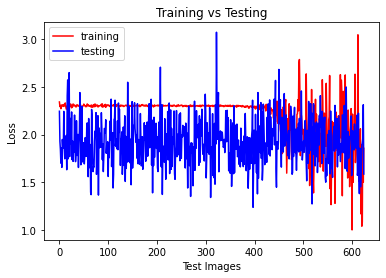

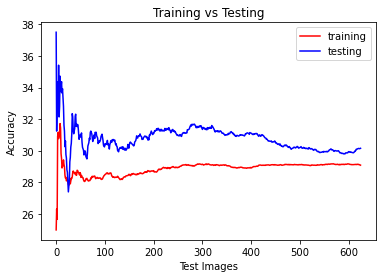

In [30]:
# init model_two
model_two = ConvNet_two().to(device)

# train, test, and plot the model
fill_model(model_two)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3042
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2713
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.2582
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.2089
MODEL: Epoch [3/5], Step [1/11250], Loss: 1.6714
MODEL: Epoch [3/5], Step [11250/11250], Loss: 1.1155
MODEL: Epoch [4/5], Step [1/11250], Loss: 1.3076
MODEL: Epoch [4/5], Step [11250/11250], Loss: 1.7123
MODEL: Epoch [5/5], Step [1/11250], Loss: 1.6472
MODEL: Epoch [5/5], Step [11250/11250], Loss: 0.9980
conv1.weight: torch.Size([64, 3, 3, 3])
conv1.bias: torch.Size([64])
conv2.weight: torch.Size([128, 64, 3, 3])
conv2.bias: torch.Size([128])
conv3.weight: torch.Size([256, 128, 3, 3])
conv3.bias: torch.Size([256])
fc1.weight: torch.Size([120, 9216])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])
check:  18.0
Accuract of the model on the test images: 49.58%
Loss of the network on the te

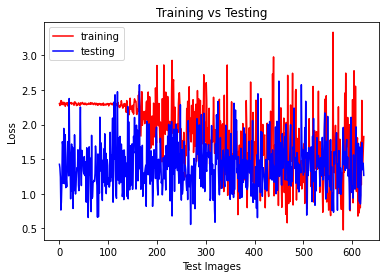

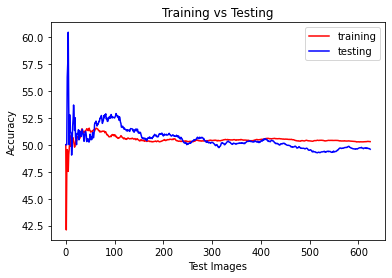

In [31]:
# init model_three
model_three = ConvNet_three().to(device)

# train, test, and plot the model
fill_model(model_three)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3001
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.0479
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.0639
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.0611
MODEL: Epoch [3/5], Step [1/11250], Loss: 1.2622
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.3293
MODEL: Epoch [4/5], Step [1/11250], Loss: 1.4171
MODEL: Epoch [4/5], Step [11250/11250], Loss: 1.2720
MODEL: Epoch [5/5], Step [1/11250], Loss: 1.1535
MODEL: Epoch [5/5], Step [11250/11250], Loss: 1.0971
conv1.weight: torch.Size([64, 3, 3, 3])
conv1.bias: torch.Size([64])
conv2.weight: torch.Size([128, 64, 3, 3])
conv2.bias: torch.Size([128])
conv3.weight: torch.Size([256, 128, 3, 3])
conv3.bias: torch.Size([256])
fc1.weight: torch.Size([120, 43264])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])
check:  18.0
Accuract of the model on the test images: 50.82%
Loss of the network on the t

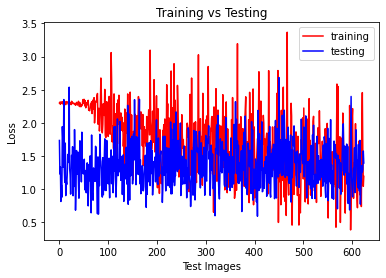

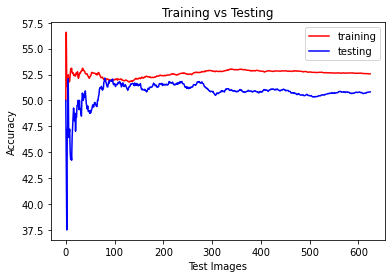

In [32]:
# init model_five architecture
model_four = ConvNet_four().to(device)

# train, test, and plot the model
fill_model(model_four)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3058
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2576
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.2722
MODEL: Epoch [2/5], Step [11250/11250], Loss: 1.6813
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.3177
MODEL: Epoch [3/5], Step [11250/11250], Loss: 1.6093
MODEL: Epoch [4/5], Step [1/11250], Loss: 1.4969
MODEL: Epoch [4/5], Step [11250/11250], Loss: 1.0439
MODEL: Epoch [5/5], Step [1/11250], Loss: 1.5390
MODEL: Epoch [5/5], Step [11250/11250], Loss: 1.4555
conv1.weight: torch.Size([16, 3, 3, 3])
conv1.bias: torch.Size([16])
conv2.weight: torch.Size([48, 16, 3, 3])
conv2.bias: torch.Size([48])
conv3.weight: torch.Size([64, 48, 3, 3])
conv3.bias: torch.Size([64])
fc1.weight: torch.Size([120, 10816])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torch.Size([10, 84])
fc3.bias: torch.Size([10])
check:  18.0
Accuract of the model on the test images: 44.76%
Loss of the network on the test i

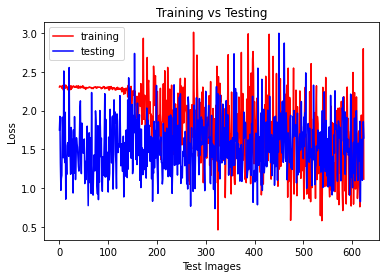

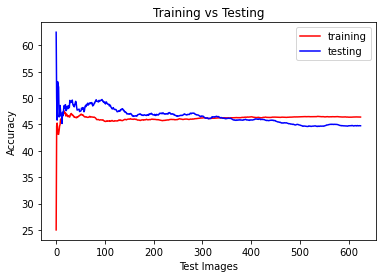

In [33]:
# init model_five architecture
model_five = ConvNet_five().to(device)

# train, test, and plot the model
fill_model(model_five)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.2725
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.3020
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.3007
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.3004
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.3019
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.2752
MODEL: Epoch [4/5], Step [1/11250], Loss: 1.7804
MODEL: Epoch [4/5], Step [11250/11250], Loss: 1.6440
MODEL: Epoch [5/5], Step [1/11250], Loss: 1.7596
MODEL: Epoch [5/5], Step [11250/11250], Loss: 1.7244
conv1.weight: torch.Size([16, 3, 3, 3])
conv1.bias: torch.Size([16])
conv2.weight: torch.Size([48, 16, 3, 3])
conv2.bias: torch.Size([48])
conv3.weight: torch.Size([64, 48, 3, 3])
conv3.bias: torch.Size([64])
conv4.weight: torch.Size([80, 64, 3, 3])
conv4.bias: torch.Size([80])
conv5.weight: torch.Size([106, 80, 3, 3])
conv5.bias: torch.Size([106])
fc1.weight: torch.Size([120, 51304])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: t

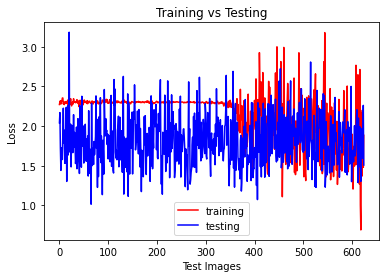

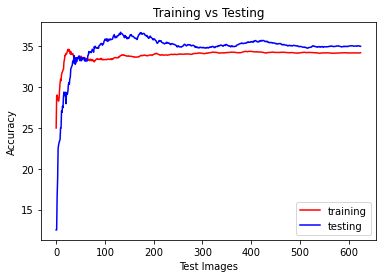

In [34]:
# init model_six architecture
model_six = ConvNet_six().to(device)

# train, test, and plot the model
fill_model(model_six)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3378
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2909
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.2882
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.2974
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.3050
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.3060
MODEL: Epoch [4/5], Step [1/11250], Loss: 2.3051
MODEL: Epoch [4/5], Step [11250/11250], Loss: 2.3029
MODEL: Epoch [5/5], Step [1/11250], Loss: 2.3044
MODEL: Epoch [5/5], Step [11250/11250], Loss: 2.3031
conv1.weight: torch.Size([10, 3, 5, 5])
conv1.bias: torch.Size([10])
conv2.weight: torch.Size([10, 10, 5, 5])
conv2.bias: torch.Size([10])
conv3.weight: torch.Size([12, 10, 5, 5])
conv3.bias: torch.Size([12])
conv4.weight: torch.Size([16, 12, 5, 5])
conv4.bias: torch.Size([16])
conv5.weight: torch.Size([18, 16, 5, 5])
conv5.bias: torch.Size([18])
fc1.weight: torch.Size([120, 2592])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torc

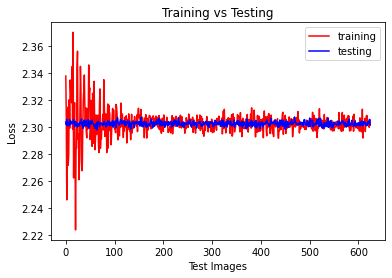

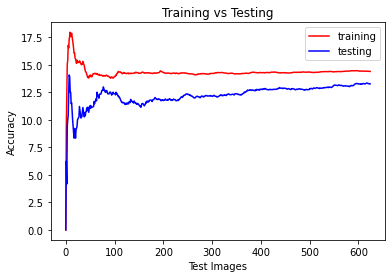

In [35]:
# init model_seven architecture
model_seven = ConvNet_seven().to(device)

# train, test, and plot the model
fill_model(model_seven)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.2811
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2896
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.3038
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.3010
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.3050
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.2344
MODEL: Epoch [4/5], Step [1/11250], Loss: 2.2739
MODEL: Epoch [4/5], Step [11250/11250], Loss: 1.7840
MODEL: Epoch [5/5], Step [1/11250], Loss: 2.0238
MODEL: Epoch [5/5], Step [11250/11250], Loss: 1.5058
conv1.weight: torch.Size([24, 3, 3, 3])
conv1.bias: torch.Size([24])
conv2.weight: torch.Size([48, 24, 3, 3])
conv2.bias: torch.Size([48])
conv3.weight: torch.Size([64, 48, 3, 3])
conv3.bias: torch.Size([64])
conv4.weight: torch.Size([128, 64, 3, 3])
conv4.bias: torch.Size([128])
conv5.weight: torch.Size([256, 128, 3, 3])
conv5.bias: torch.Size([256])
fc1.weight: torch.Size([120, 6400])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight:

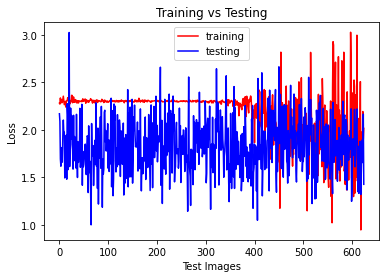

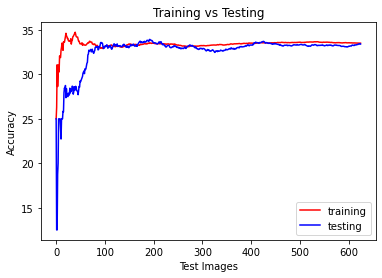

In [36]:
# init model_eight architecture
model_eight = ConvNet_eight().to(device)

# train, test, and plot the model
fill_model(model_eight)

/home/mhrrs/.local/lib/python3.9/site-packages/torch/nn/functional.py:1967: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


MODEL: Epoch [1/5], Step [1/11250], Loss: 2.4032
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2614
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.3324
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.2719
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.2972
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.3065
MODEL: Epoch [4/5], Step [1/11250], Loss: 2.2935
MODEL: Epoch [4/5], Step [11250/11250], Loss: 2.3043
MODEL: Epoch [5/5], Step [1/11250], Loss: 2.3040
MODEL: Epoch [5/5], Step [11250/11250], Loss: 2.3133
conv1.weight: torch.Size([10, 3, 5, 5])
conv1.bias: torch.Size([10])
conv2.weight: torch.Size([10, 10, 5, 5])
conv2.bias: torch.Size([10])
conv3.weight: torch.Size([12, 10, 5, 5])
conv3.bias: torch.Size([12])
conv4.weight: torch.Size([16, 12, 5, 5])
conv4.bias: torch.Size([16])
conv5.weight: torch.Size([18, 16, 5, 5])
conv5.bias: torch.Size([18])
fc1.weight: torch.Size([120, 2592])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torc

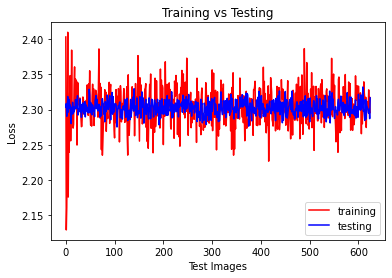

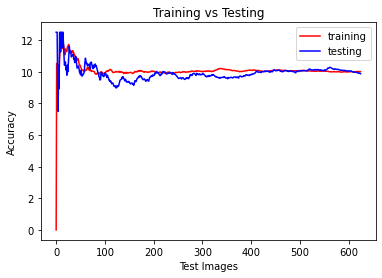

In [37]:
# init model_nine architecture
model_nine = ConvNet_nine().to(device)

# train, test, and plot the model
fill_model(model_nine)

MODEL: Epoch [1/5], Step [1/11250], Loss: 2.3132
MODEL: Epoch [1/5], Step [11250/11250], Loss: 2.2993
MODEL: Epoch [2/5], Step [1/11250], Loss: 2.2947
MODEL: Epoch [2/5], Step [11250/11250], Loss: 2.3137
MODEL: Epoch [3/5], Step [1/11250], Loss: 2.3090
MODEL: Epoch [3/5], Step [11250/11250], Loss: 2.3028
MODEL: Epoch [4/5], Step [1/11250], Loss: 2.2962
MODEL: Epoch [4/5], Step [11250/11250], Loss: 2.3033
MODEL: Epoch [5/5], Step [1/11250], Loss: 2.3006
MODEL: Epoch [5/5], Step [11250/11250], Loss: 2.3042
conv1.weight: torch.Size([10, 3, 5, 5])
conv1.bias: torch.Size([10])
conv2.weight: torch.Size([10, 10, 5, 5])
conv2.bias: torch.Size([10])
conv3.weight: torch.Size([12, 10, 5, 5])
conv3.bias: torch.Size([12])
conv4.weight: torch.Size([16, 12, 5, 5])
conv4.bias: torch.Size([16])
conv5.weight: torch.Size([18, 16, 5, 5])
conv5.bias: torch.Size([18])
fc1.weight: torch.Size([120, 2592])
fc1.bias: torch.Size([120])
fc2.weight: torch.Size([84, 120])
fc2.bias: torch.Size([84])
fc3.weight: torc

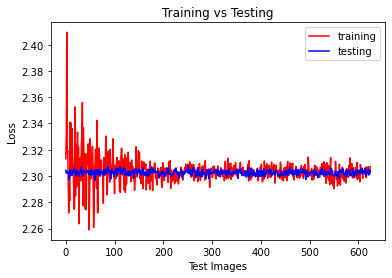

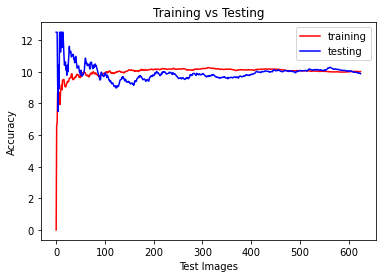

In [38]:
# init ten architecture
model_ten = ConvNet_ten().to(device)

# train, test, and plot the model
fill_model(model_ten)